In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/Users/abhi/Documents/Comcast_telecom_complaints_data.csv")  # Update filename if needed

# Display basic info
print("Dataset Info:\n")
print(df.info())

# Check for missing values
print("\nMissing Values:\n")
print(df.isnull().sum())

# Preview the first few rows
print("\nDataset Preview:\n")
print(df.head())

# Check for duplicate complaints
duplicate_count = df.duplicated(subset=["Customer Complaint"]).sum()
print(f"\nNumber of duplicate complaints: {duplicate_count}")


Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.3+ KB
None

Missing Values:

Ticket #                       0
Customer Complaint          

In [6]:
import re

# 1️⃣ Remove duplicate complaints
df = df.drop_duplicates(subset=["Customer Complaint"], keep="first")
print(f"Updated number of rows after removing duplicates: {df.shape[0]}")

# 2️⃣ Convert "Date" column to datetime format
# Convert "Date" column to datetime format with explicit format
df["Date"] = pd.to_datetime(df["Date"], format="%d-%m-%y", errors="coerce")


# 3️⃣ Clean the "Customer Complaint" text
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-z0-9\s]', '', text)  # Remove special characters
    return text

df["Customer Complaint"] = df["Customer Complaint"].apply(clean_text)

# Preview the cleaned dataset
print("\nCleaned Dataset Preview:\n")
print(df.head())


Updated number of rows after removing duplicates: 1731

Cleaned Dataset Preview:

  Ticket #                                 Customer Complaint       Date  \
0   250635                      comcast cable internet speeds 2015-04-22   
1   223441        payment disappear  service got disconnected 2015-08-04   
2   242732                                  speed and service 2015-04-18   
3   277946  comcast imposed a new usage cap of 300gb that ... 2015-07-05   
4   307175         comcast not working and no service to boot 2015-05-26   

  Date_month_year         Time        Received Via      City     State  \
0       22-Apr-15   3:53:50 PM  Customer Care Call  Abingdon  Maryland   
1       04-Aug-15  10:22:56 AM            Internet   Acworth   Georgia   
2       18-Apr-15   9:55:47 AM            Internet   Acworth   Georgia   
3       05-Jul-15  11:59:35 AM            Internet   Acworth   Georgia   
4       26-May-15   1:25:26 PM            Internet   Acworth   Georgia   

   Zip code  Sta

In [12]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# 1️⃣ Download the VADER lexicon
nltk.download('vader_lexicon')

# 2️⃣ Initialize Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# 3️⃣ Function to get sentiment scores
def get_sentiment(text):
    score = sia.polarity_scores(text)
    if score['compound'] >= 0.05:
        return "Positive"
    elif score['compound'] <= -0.05:
        return "Negative"
    else:
        return "Neutral"

# 4️⃣ Apply sentiment analysis
df["Sentiment"] = df["Customer Complaint"].apply(get_sentiment)

# 5️⃣ Preview sentiment results
print(df[["Customer Complaint", "Sentiment"]].head())


                                  Customer Complaint Sentiment
0                      comcast cable internet speeds   Neutral
1        payment disappear  service got disconnected  Negative
2                                  speed and service   Neutral
3  comcast imposed a new usage cap of 300gb that ...  Negative
4         comcast not working and no service to boot  Positive


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/abhi/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


/var/folders/1q/2by41111119_njbmttgz2kzw0000gn/T/ipykernel_8044/834744273.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Sentiment"], palette=["green", "gray", "red"], order=["Positive", "Neutral", "Negative"])


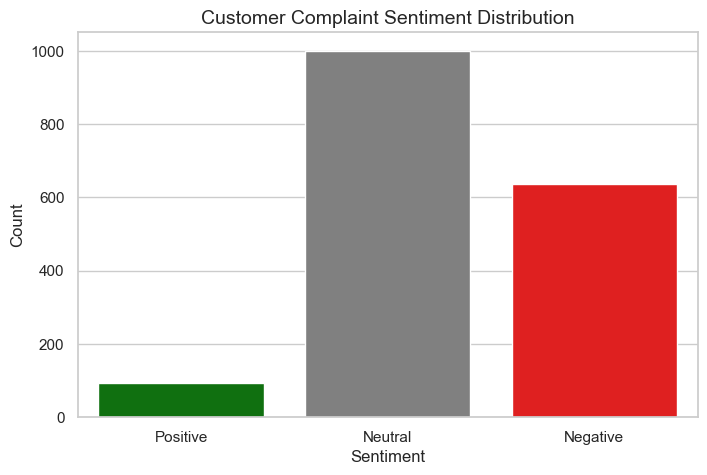

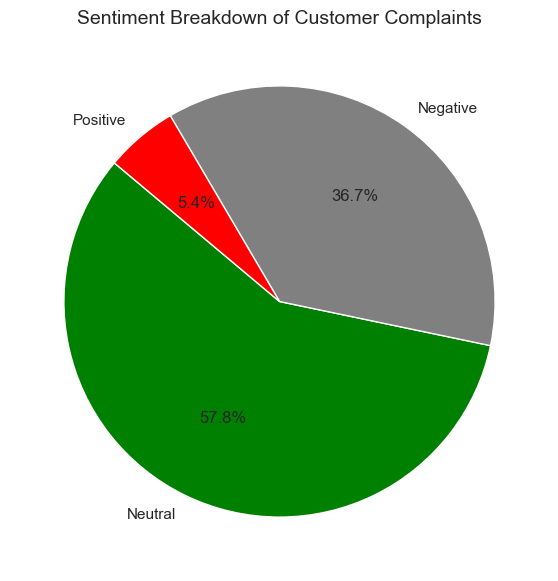

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# 1️⃣ Bar Chart: Sentiment Distribution
plt.figure(figsize=(8,5))
sns.countplot(x=df["Sentiment"], palette=["green", "gray", "red"], order=["Positive", "Neutral", "Negative"])
plt.title("Customer Complaint Sentiment Distribution", fontsize=14)
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

# 2️⃣ Pie Chart: Sentiment Breakdown
plt.figure(figsize=(7,7))
df["Sentiment"].value_counts().plot.pie(autopct="%1.1f%%", colors=["green", "gray", "red"], startangle=140)
plt.title("Sentiment Breakdown of Customer Complaints", fontsize=14)
plt.ylabel("")  # Hide y-label
plt.show()
